In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/clases-II-2021/Machine-Learning/datasets/taller02/"#Esta es la ruta

# name='BC.csv'

Mounting your Google Drive ...
Mounted at /content/drive


In [ ]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

##Exploración

In [ ]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,3,16,15,14,0,0,0,0,8,13,8,16,0,0,0,0,1,6,15,11,0,0,0,1,8,13,15,1,0,0,0,9,16,16,5,0,0,0,0,3,13,16,16,11,5,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,13,6,15,4,0,0,0,2,1,13,13,0,0,0,0,0,2,15,11,1,0,0,0,0,0,1,12,12,1,0,0,0,0,0,1,10,8,0,0,0,8,4,5,14,9,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,0,7,8,0,0,0,0,0,1,13,6,2,2,0,0,0,7,15,0,9,8,0,0,5,16,10,0,16,6,0,0,4,15,16,13,16,1,0,0,0,0,3,15,10,0,0,0,0,0,2,16,4,0,0,4


In [ ]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,

##Visualización

In [ ]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

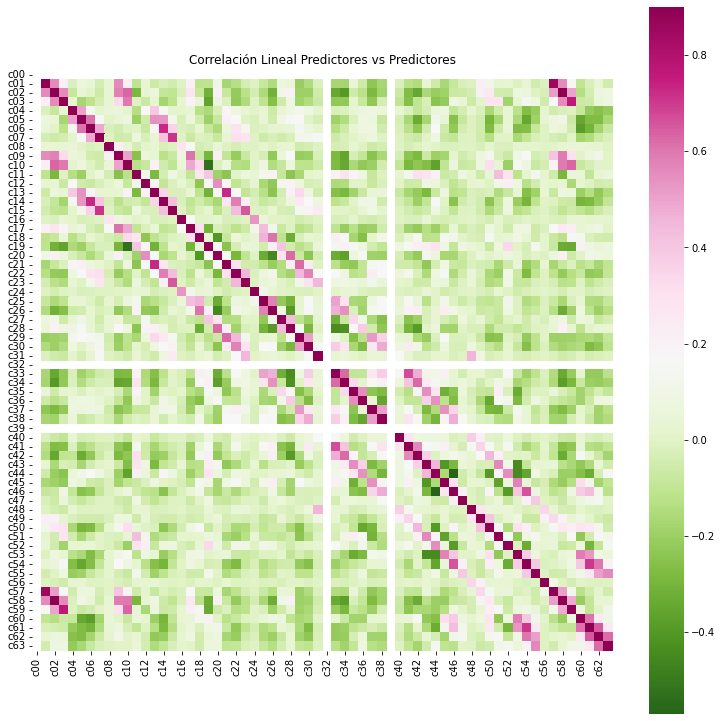

In [ ]:
predictor_names = digits.columns[:64]
n_show = min(len(predictor_names),70)

corrmat = digits[predictor_names[:n_show]].corr()
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax, cmap='PiYG_r')
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

In [ ]:
targets_count = []

for i in range(len(np.unique(digits['target'].values))):
    targets_count.append(tuple([i,digits[digits['target']==i].shape[0]]))

print(f"Cantidad de datos asociados a cada clase: {targets_count}")

Cantidad de datos asociados a cada clase: [(0, 178), (1, 182), (2, 177), (3, 183), (4, 181), (5, 182), (6, 181), (7, 179), (8, 174), (9, 180)]


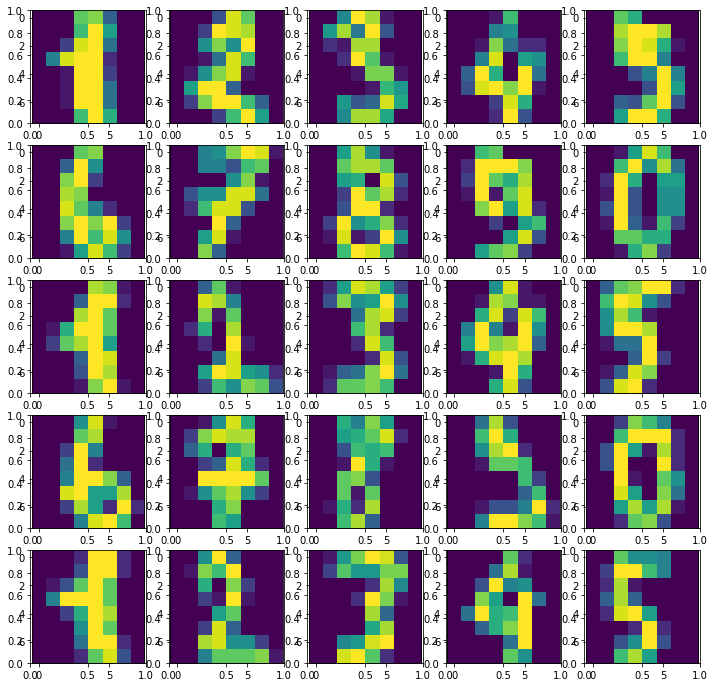

In [ ]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(1,nx*ny+1):
    image=digits_dict['images'][i] 
    fig.add_subplot(nx, ny, i)
    plt.imshow(image)
plt.show()

##Modelo


In [ ]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
Regresor=LogisticRegression()
Regresor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

##Métricas

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
Regresor.score(X_test,y_test)

0.9663299663299664

In [ ]:
y_hat=Regresor.predict(X_test)
f1_score(y_test,y_hat,average='micro')

0.9663299663299664

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.95      0.95      0.95        59
           2       0.98      1.00      0.99        55
           3       0.97      0.96      0.96        68
           4       0.97      0.98      0.98        66
           5       0.96      0.90      0.93        52
           6       1.00      1.00      1.00        54
           7       0.98      0.95      0.97        62
           8       0.89      0.98      0.93        51
           9       0.95      0.94      0.94        64

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



##PCA

In [ ]:
pca = PCA(n_components=10) #Modelo, se tomarán 10 n-componentes, es decir, se tomarán 10 variables para reducir la dimensión
principalComponents = pca.fit_transform(X) 

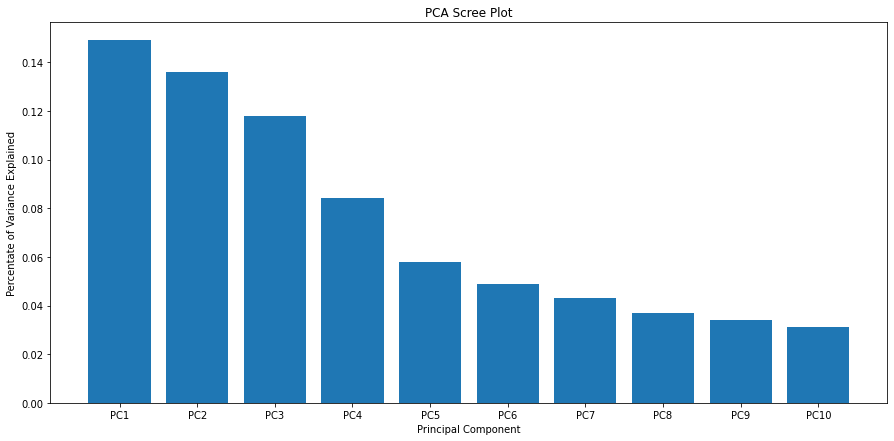

In [ ]:
#Varianzas por n-componentes
percent_variance = np.round(pca.explained_variance_ratio_, decimals =3)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(15,7))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

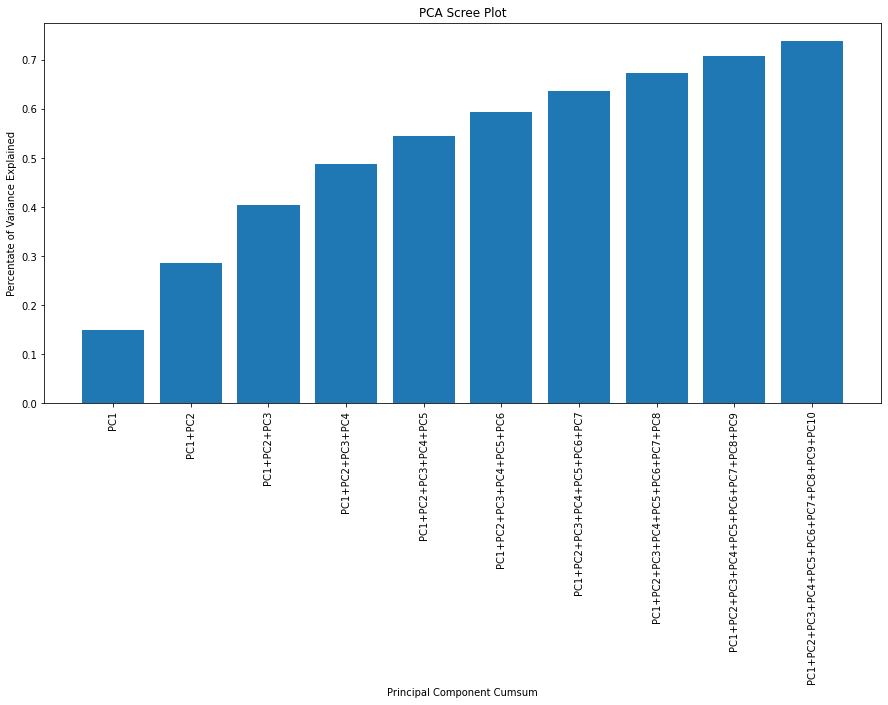

In [ ]:
# Gráfico de Varianza acumulada entre las n-componentes
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 
           'PC1+PC2', 
           'PC1+PC2+PC3', 
           'PC1+PC2+PC3+PC4', 
           'PC1+PC2+PC3+PC4+PC5', 
           'PC1+PC2+PC3+PC4+PC5+PC6',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10']

plt.figure(figsize=(15,7))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.xticks(x= range(1,11), rotation='vertical')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
#Veamos cuanto es el valor del acumulado al final
percent_variance_cum[9]

0.7390000000000002

In [ ]:
pca2 = PCA(n_components=15) #Modelo, se tomarán 15 n-componentes, es decir, se tomarán 10 variables para reducir la dimensión
principalComponents2 = pca2.fit_transform(X) 

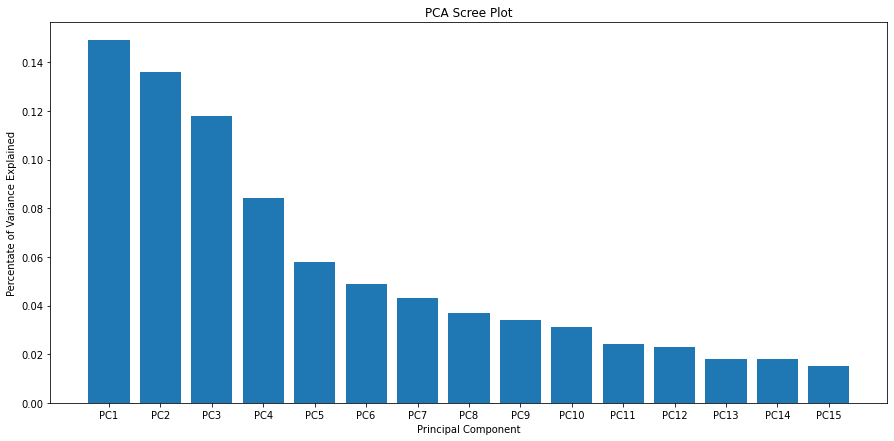

In [ ]:
#Varianzas por n-componentes
percent_variance2 = np.round(pca2.explained_variance_ratio_, decimals =3)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13','PC14','PC15']

plt.figure(figsize=(15,7))
plt.bar(x= range(1,16), height=percent_variance2, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

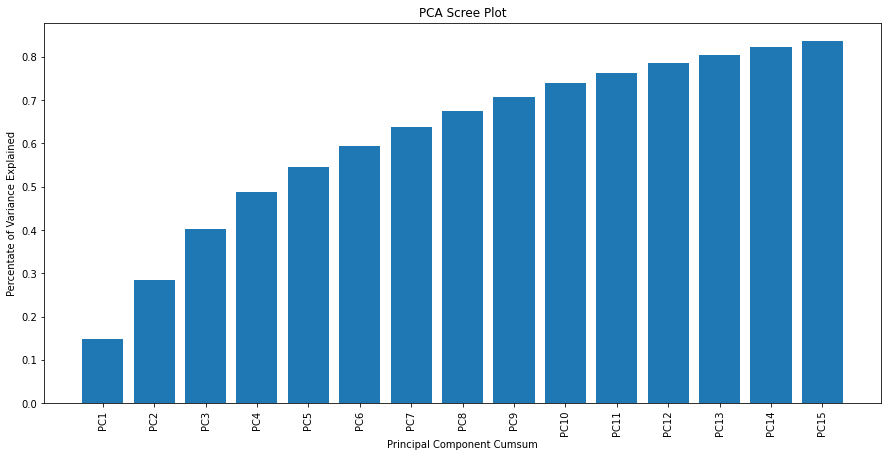

In [ ]:
percent_variance_cum2 = np.cumsum(percent_variance2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13','PC14','PC15']

plt.figure(figsize=(15,7))
plt.bar(x= range(1,16), height=percent_variance_cum2, tick_label=columns)
plt.xticks(x= range(1,16), rotation='vertical')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
percent_variance_cum2[14]

0.8370000000000003

In [ ]:
principalDataframe = pd.DataFrame(data = principalComponents2, 
                                  columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13','PC14','PC15'])
targetDataframe = digits_dict["target"]
df_reducido['target']=targetDataframe
df_reducido.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,0,target
0,-1.259466,21.274884,-9.463049,13.014285,-7.128740,-7.440284,3.252096,2.552369,-0.584073,3.619971,2.587380,1.553155,0.899551,-3.290281,5.944562,0,0
1,7.957616,-20.768712,4.439513,-14.893354,5.896929,-6.483761,2.123156,-4.618262,3.579285,-1.086348,-5.397691,-2.127524,-2.408285,-6.414142,-2.265012,1,1
2,6.991923,-9.955976,2.958558,-12.288286,-18.126254,-4.508041,1.843306,-16.415045,0.719479,4.254246,-1.226651,-0.384653,0.170640,6.882195,-1.691937,2,2
3,-15.906106,3.332462,9.824361,-12.276024,6.964864,1.089171,-1.040238,10.975336,-3.254245,6.508448,-5.061371,2.393612,2.613868,-4.622643,0.738441,3,3
4,23.306866,4.269063,-5.675129,-13.851582,-0.358257,-2.857836,-0.719823,13.042037,-3.833616,13.416656,2.676915,-1.757165,-5.327623,1.458525,-0.691404,4,4


In [ ]:
#Se utilizan las componentes proyectadas
X = df_reducido[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13','PC14','PC15']]
Y = df_reducido['target']

#Se crean los conjuntos de entrenamiento y test desde los conjuntos definidos anteriormente
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

##Modelo + PCA

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
model.score(X_test,Y_test)

0.930976430976431

In [ ]:
y_hat=model.predict(X_test)
confusion_matrix(Y_test, y_hat)

array([[60,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  1,  0,  0,  1,  0,  3,  5],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 65,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0,  2,  1],
       [ 1,  1,  0,  0,  1, 58,  0,  0,  1,  1],
       [ 1,  1,  0,  0,  0,  0, 64,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 53,  2,  0],
       [ 0,  3,  0,  1,  1,  2,  1,  0, 43,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0, 48]])

In [ ]:
print(classification_report(Y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        61
           1       0.91      0.84      0.87        61
           2       1.00      1.00      1.00        55
           3       0.94      0.96      0.95        68
           4       0.95      0.95      0.95        59
           5       0.91      0.92      0.91        63
           6       0.97      0.96      0.96        67
           7       0.98      0.93      0.95        57
           8       0.81      0.83      0.82        52
           9       0.86      0.94      0.90        51

    accuracy                           0.93       594
   macro avg       0.93      0.93      0.93       594
weighted avg       0.93      0.93      0.93       594

